# 04_TransferLearningFeatureExtraction_ResNet50V2

Written by: Rupesh Kumar Dey


Notebook used for model development and testing for Transfer Learning Models with Feature Extraction (no tuning) - ResNet50V2

## Importing required Libraries

In [1]:
!pip install seaborn
!pip install tensorflow_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 20.4 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 18.8 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import *

In [3]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Development - Transfer Learning Feature Extraction (ResNet50-V2)
Models Developed and Tested
1. ResNet50V2


### 04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL: Transfer Learning with ResNet50V2 model on NORMAL Image

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [9]:
# Create Res Net 50 V2 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
# Model summary
TransferLearningFeatureExtraction_ResNet50V2_NORMAL.summary()
# Train model 
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL.ckpt"
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_history = trainModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL, train_data, valid_data, checkpointPath ,epochs = 50)

2022-08-26 06:23:17.907982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 06:23:17.952539: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 06:23:17.952928: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 06:23:17.954549: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 06:23:17.954911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

102883328/102869336 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                            

2022-08-26 06:23:26.899074: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


131/131 [==============================] - ETA: 0s - loss: 0.7821 - accuracy: 0.6939 - recall: 0.5996
Epoch 00001: val_accuracy improved from -inf to 0.25347, saving model to TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL.ckpt
131/131 [==============================] - 62s 434ms/step - loss: 0.7821 - accuracy: 0.6939 - recall: 0.5996 - val_loss: 1.3606 - val_accuracy: 0.2535 - val_recall: 0.0000e+00
Epoch 2/50
131/131 [==============================] - ETA: 0s - loss: 0.5530 - accuracy: 0.7889 - recall: 0.7366
Epoch 00002: val_accuracy improved from 0.25347 to 0.44444, saving model to TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL.ckpt
131/131 [==============================] - 37s 281ms/step - loss: 0.5530 - accuracy: 0.7889 - recall: 0.7366 - val_loss: 1.1912 - val_accuracy: 0.4444 - val_recall: 0.1424
Epoch 

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 12ms/step
Confusion Matrix:


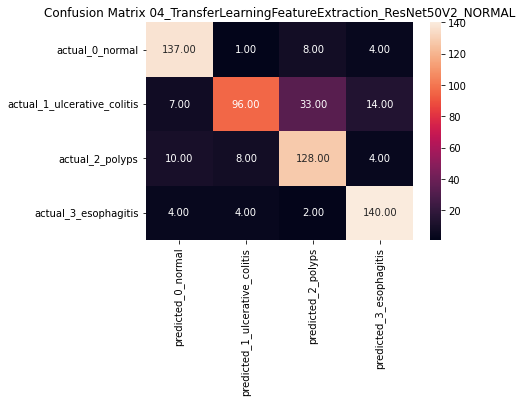

In [10]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_NORMAL, test_data, "04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL/results/confusionMatrix/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL.jpg")

2022-08-26 06:54:23.677154: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://477720dc-e814-490e-a935-5ee1f1f0ef66/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


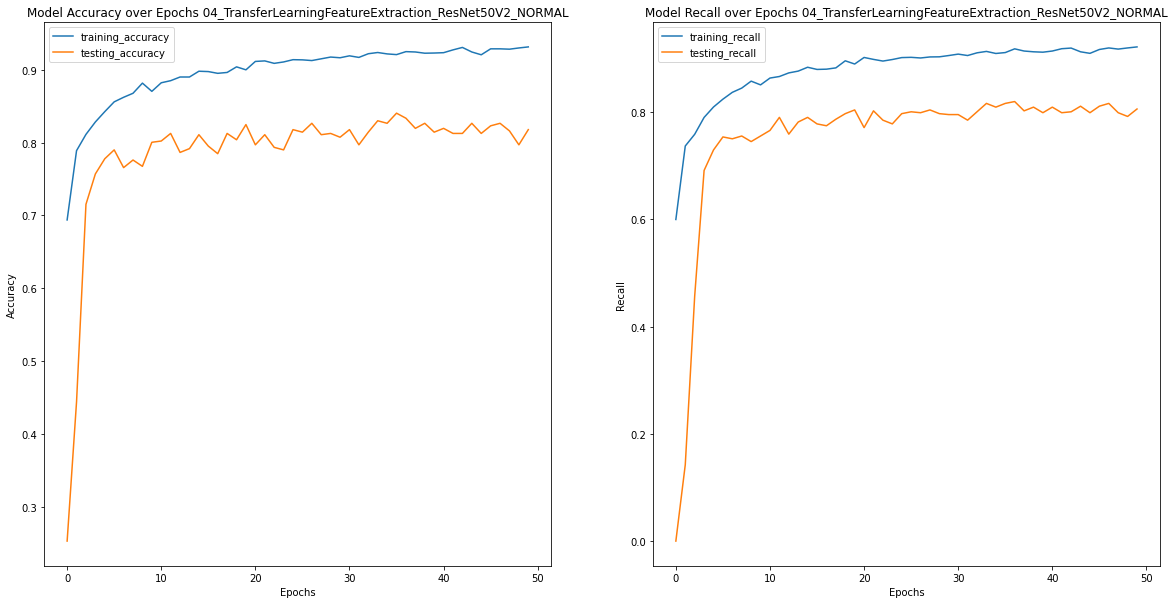

In [11]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL/results/classificationReport/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL.csv")
# Save model training history
historyPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL/history/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL", location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL/history/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL.jpg")

### 04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE: Transfer Learning with ResNet50V2 model on CLAHE Image

#### Dataset Loading 

In [12]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [13]:
# Create Res Net 50 V2 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_CLAHE = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
# Model summary
TransferLearningFeatureExtraction_ResNet50V2_CLAHE.summary()
# Train model 
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE.ckpt"
TransferLearningFeatureExtraction_ResNet50V2_CLAHE_history = trainModel(TransferLearningFeatureExtraction_ResNet50V2_CLAHE, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization_6 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_7 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 20)                2002

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 7s 11ms/step
Confusion Matrix:


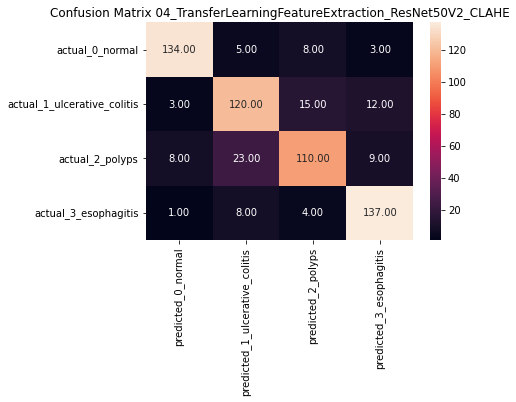

In [14]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_CLAHE = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_CLAHE,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_CLAHE, test_data, "04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE/results/confusionMatrix/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE.jpg")

INFO:tensorflow:Assets written to: ram://7d9d39d7-0a19-4c20-831a-025047744d07/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


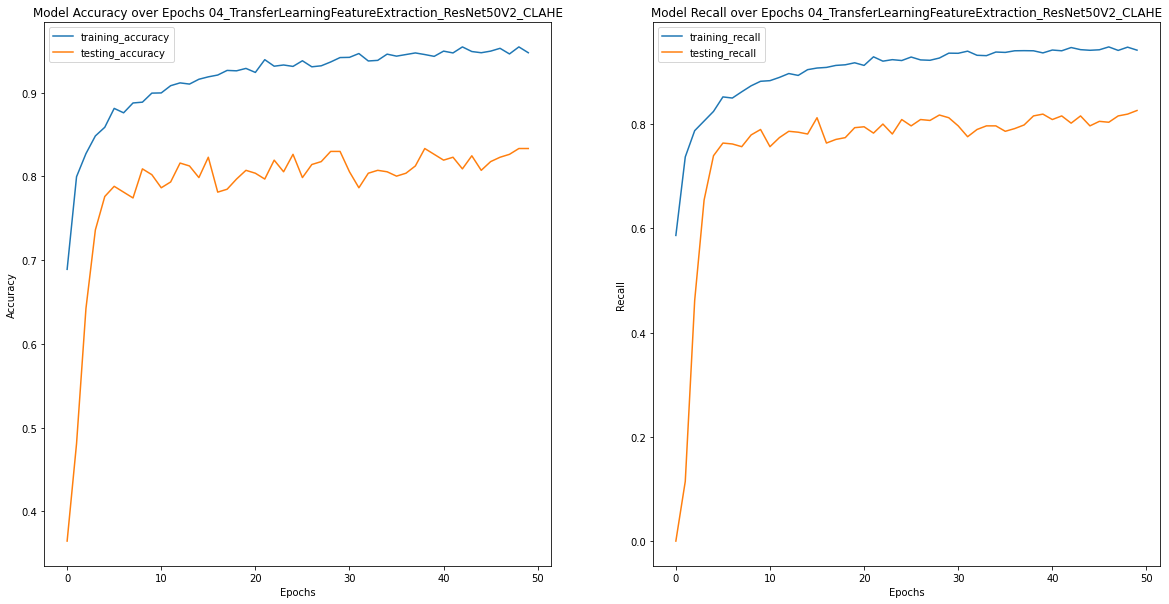

In [15]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE/results/classificationReport/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE.csv")
# Save model training history
historyPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE/history/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V2_CLAHE_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE", location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE/history/04_TransferLearningFeatureExtraction_ResNet50V2_CLAHE.jpg")

### 04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE: Transfer Learning with ResNet50V2 model on MULTISCALE Image

#### Dataset Loading 

In [16]:
# Defining path of dataset
train_path = "/Dataset/Dataset_MULTISCALE/train"
test_path = "/Dataset/Dataset_MULTISCALE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [17]:
# Create Res Net 50 V2 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
# Model summary
TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE.summary()
# Train model 
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE.ckpt"
TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE_history = trainModel(TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization_12 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_13 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 20)                2002

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 11ms/step
Confusion Matrix:


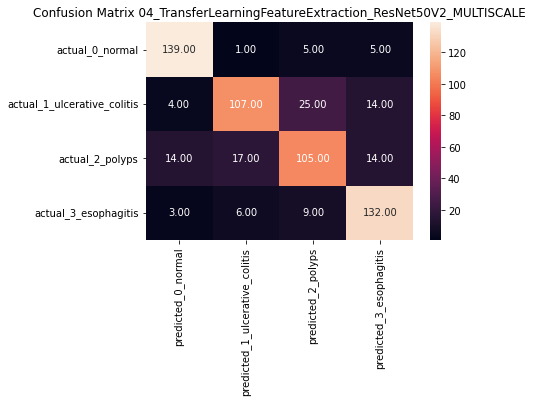

In [18]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE, test_data, "04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE" ,
                                                                data_class = ["0_normal_MULTISCALE",
                                                                              "1_ulcerative_colitis_MULTISCALE",
                                                                              "2_polyps_MULTISCALE",
                                                                              "3_esophagitis_MULTISCALE"],
                                                                location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE/results/confusionMatrix/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE.jpg")

INFO:tensorflow:Assets written to: ram://9f7c9c24-5e64-4bd4-bd16-2fe0e848529f/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


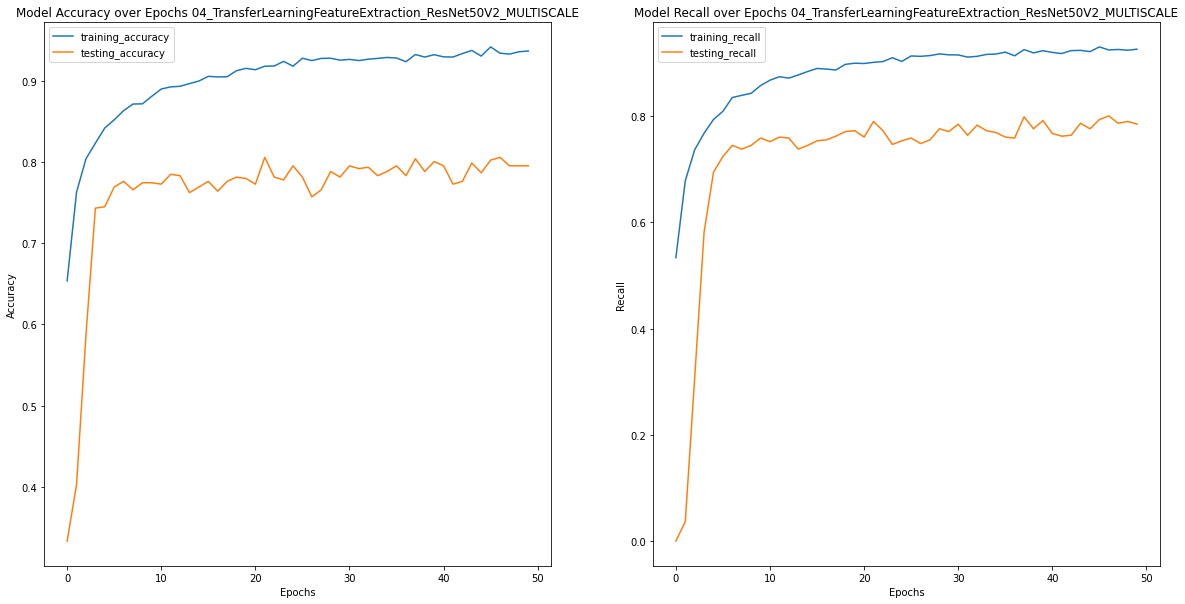

In [19]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE/results/classificationReport/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE.csv")
# Save model training history
historyPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE/history/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE", location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE/history/04_TransferLearningFeatureExtraction_ResNet50V2_MULTISCALE.jpg")

### 04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH: Transfer Learning with ResNet50V2 model on RAYLEIGH Image

#### Dataset Loading 

In [20]:
# Defining path of dataset
train_path = "/Dataset/Dataset_RAYLEIGH/train"
test_path = "/Dataset/Dataset_RAYLEIGH/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [21]:
# Create Res Net 50 V2 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
# Model summary
TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH.summary()
# Train model 
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH.ckpt"
TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH_history = trainModel(TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization_18 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_19 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 20)                2002

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 7s 11ms/step
Confusion Matrix:


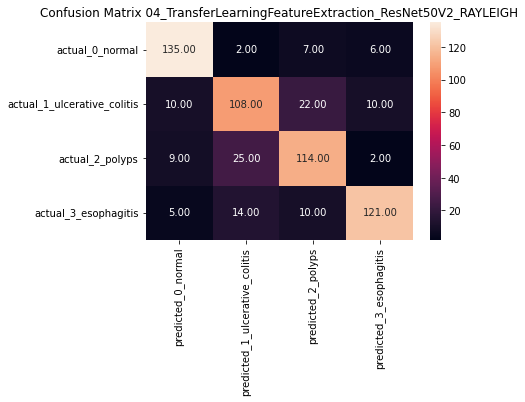

In [22]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH,checkpointPath)
# Generate results for validation and save 
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH, test_data, "04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH" ,
                                                                data_class = ["0_normal_RAYLEIGH",
                                                                              "1_ulcerative_colitis_RAYLEIGH",
                                                                              "2_polyps_RAYLEIGH",
                                                                              "3_esophagitis_RAYLEIGH"],
                                                                location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH/results/confusionMatrix/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH.jpg")

INFO:tensorflow:Assets written to: ram://8c213685-c409-4b97-acf6-31abf3eefc71/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


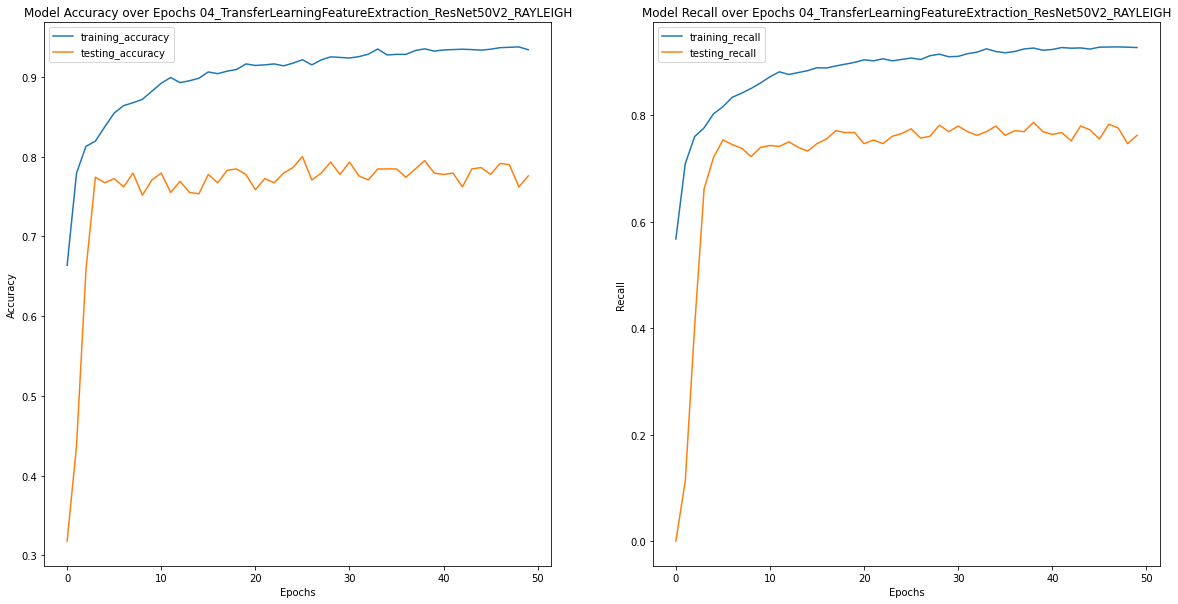

In [23]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH/results/classificationReport/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH.csv")
# Save model training history
historyPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH/history/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH_history, historyPath)
# Load and ploty model training history
history = load_history(historyPath)
plot_history(history, "04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH", location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH/history/04_TransferLearningFeatureExtraction_ResNet50V2_RAYLEIGH.jpg")

### 04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam: Transfer Learning with ResNet50V2 model on NORMAL Image (Optimizer - Adam)

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create Res Net 50 V2 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
# Model summary
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam.summary()
# Train model 
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam.ckpt"
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam_history = trainModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam, train_data, valid_data, checkpointPath ,epochs = 50)

2022-08-26 09:00:28.093323: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 09:00:28.167118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 09:00:28.167639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 09:00:28.169649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 09:00:28.170013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

102883328/102869336 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                            

2022-08-26 09:00:43.197011: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


131/131 [==============================] - ETA: 0s - loss: 0.5952 - accuracy: 0.7752 - recall: 0.7171
Epoch 00001: val_accuracy improved from -inf to 0.36632, saving model to TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam.ckpt
131/131 [==============================] - 69s 465ms/step - loss: 0.5952 - accuracy: 0.7752 - recall: 0.7171 - val_loss: 1.2647 - val_accuracy: 0.3663 - val_recall: 0.0399
Epoch 2/50
131/131 [==============================] - ETA: 0s - loss: 0.4085 - accuracy: 0.8472 - recall: 0.8157
Epoch 00002: val_accuracy improved from 0.36632 to 0.47049, saving model to TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam.ckpt
131/131 [==============================] - 48s 367ms/step - loss: 0.4085 - accuracy: 0.8472 - recall: 0.8157 - val_loss: 1.1312 - val_accuracy

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 12ms/step
Confusion Matrix:


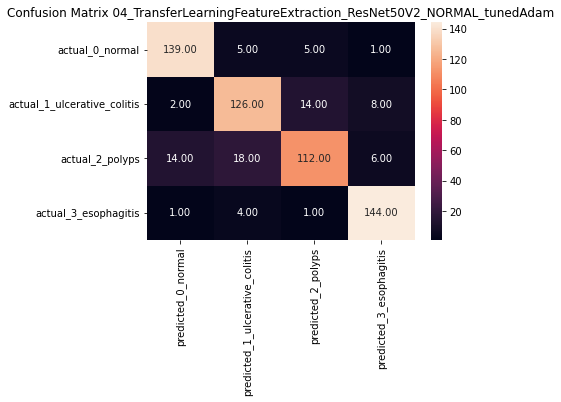

In [6]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam, test_data, "04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam/results/confusionMatrix/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam.jpg")

2022-08-26 09:31:48.466338: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://30463568-00a3-4134-b1cc-d7b59111ee7c/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


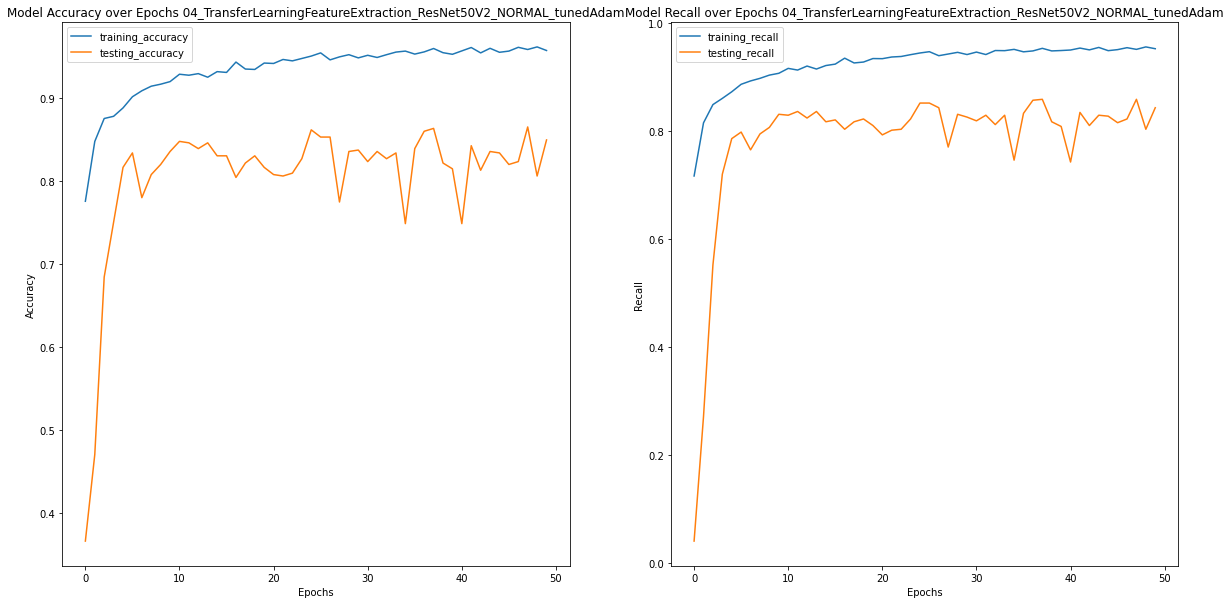

In [7]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam/results/classificationReport/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam.csv")
# Save model training history
historyPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam/history/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam_history, historyPath)
# Load and plot model training history
history = history = load_history(historyPath)
plot_history(history, "04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam", location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam/history/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam.jpg")

### 04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam: Transfer Learning with ResNet50V2 model on NORMAL Image (Optimizer - LrScheduler)

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [9]:
# Create Res Net 50 V2 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
# Model summary
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler.summary()
# Train model
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler.ckpt"
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization_6 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_7 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 20)                2002

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 10s 15ms/step
Confusion Matrix:


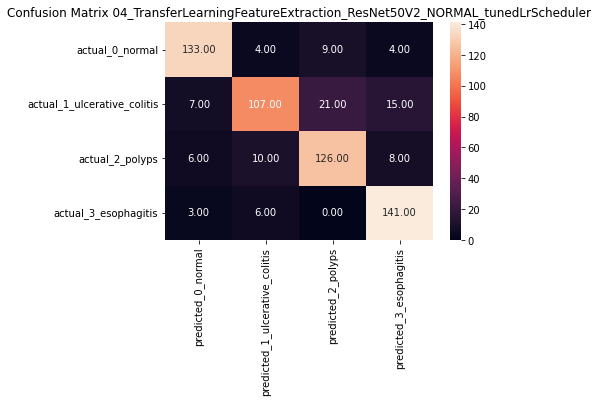

In [10]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler, test_data, "04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler/results/confusionMatrix/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://3fde0b1b-14e7-4c3f-83b9-594c1afa2302/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


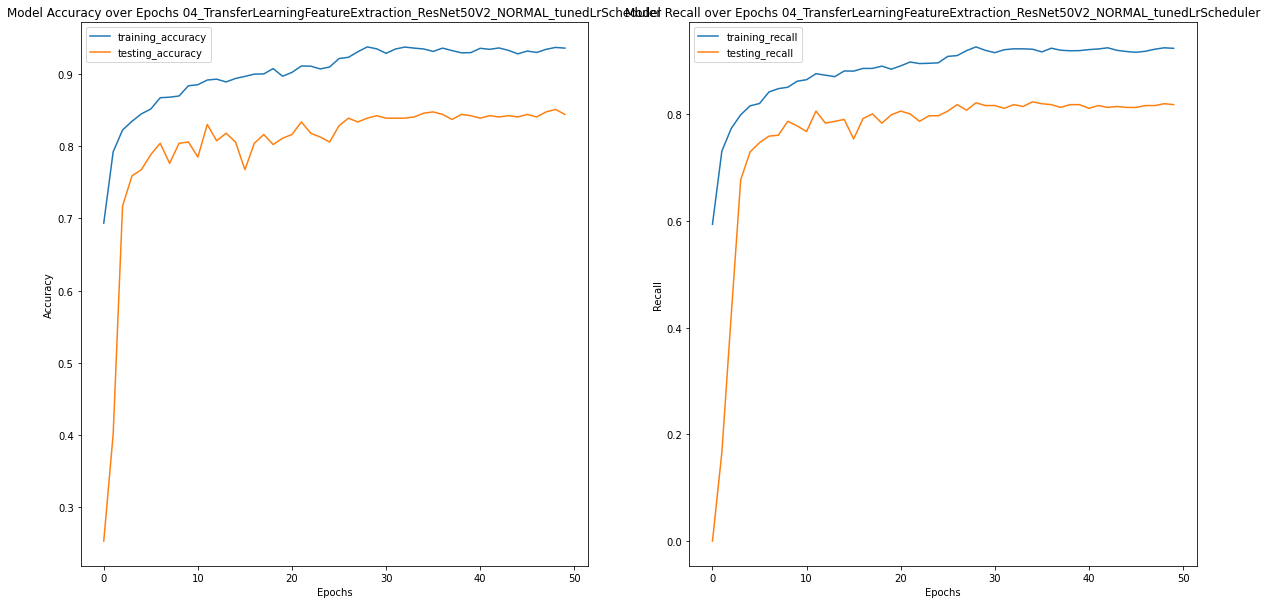

In [11]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler/results/classificationReport/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler.csv")
# Save model training history
historyPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler/history/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler_history, historyPath)
# Load and plot model training history
history = history = load_history(historyPath)
plot_history(history, "04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler", location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler/history/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedLrScheduler.jpg")

### 04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam: Transfer Learning with ResNet50V2 model on NORMAL Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [12]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [13]:
# Create Res Net 50 V2 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
# Model summary
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.summary()
# Train model
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.ckpt"
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization_12 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_13 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 20)                2002

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 12ms/step
Confusion Matrix:


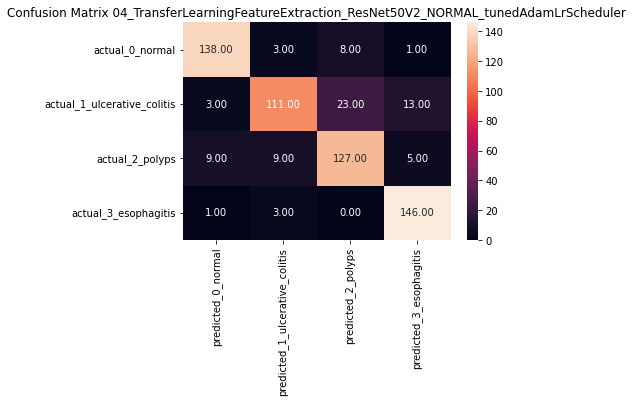

In [14]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler, test_data, "04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://97b14987-adf1-40f1-9eef-dfb4bb2e8de4/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


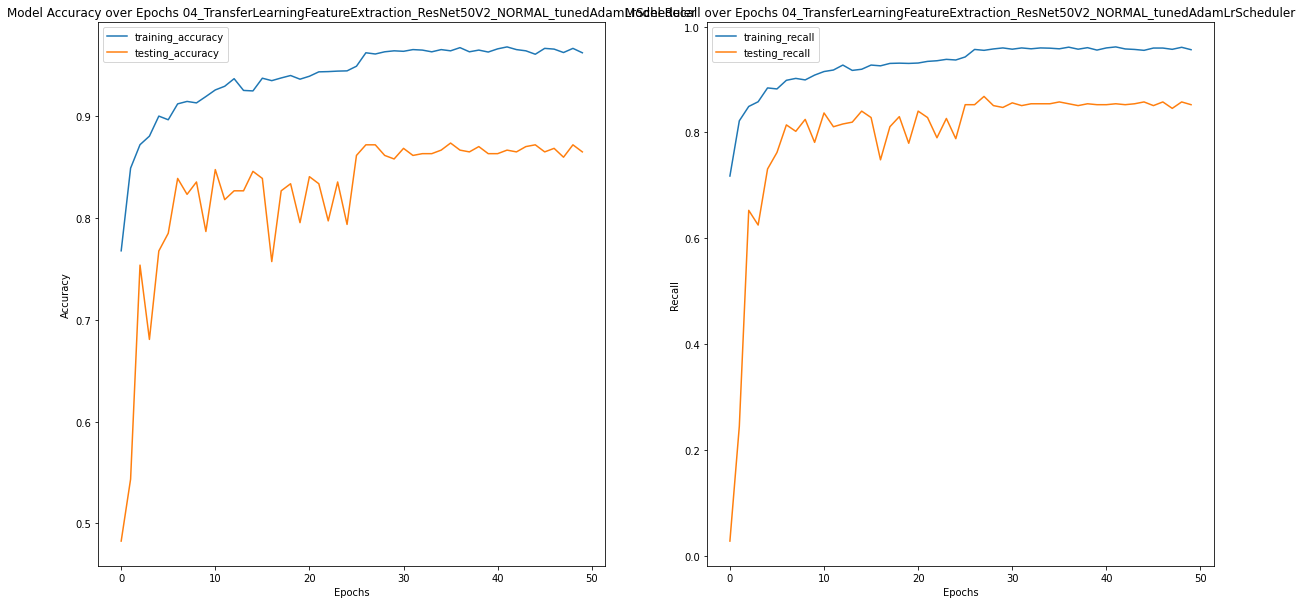

In [15]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/classificationReport/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.csv")
# Save model training history
historyPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/history/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler_history, historyPath)
# Load and plot model training history
history = history = load_history(historyPath)
plot_history(history, "04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler", location = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/history/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.jpg")